<a href="https://colab.research.google.com/github/legionnaire12/legion-bin/blob/master/SQL_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pyts #Installs pyts library

In [0]:
pip install mysql-connector


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
# Add in MySQL connection
import mysql.connector
from mysql.connector import (connection)

In [0]:
# Mount the drive to access my Google storage
from google.colab import drive
drive.mount("/content/gdrive")


In [0]:
location = '/content/gdrive/My Drive/BTCdatasets/' # Change to drive when set up
path = datapath4file(location)

In [0]:
# Connect to the database
cnx = connection.MySQLConnection(user='biosearc_test', password='D0f7znHyE8bsepB2',
                                 host='starbuck.asoshared.com',
                                 port='3306',
                                 database='biosearc_prices')
mycursor = cnx.cursor()

In [0]:

mycursor.execute("SELECT * FROM BTCTrainingPositive")

myresult = mycursor.fetchall()
counter = 0

for x in myresult:
  counter += 1
  print(x)
  if counter == 4:
    break

print(counter)

(1, Decimal('6860'), Decimal('6835'), Decimal('6828'), Decimal('6857'), Decimal('6848'), Decimal('6883'), Decimal('6854'), Decimal('6843'), Decimal('6826'), Decimal('6846'), Decimal('6844'), Decimal('6850'), Decimal('6861'), Decimal('6847'), Decimal('6833'), Decimal('6780'), Decimal('6786'), Decimal('6759'), Decimal('6725'), Decimal('6740'), Decimal('6738'), Decimal('6709'), Decimal('6702'), Decimal('6712'), Decimal('6724'), Decimal('6694'), Decimal('6694'), Decimal('6698'), Decimal('6693'), Decimal('6721'), Decimal('6700'), Decimal('6724'), Decimal('6630'), Decimal('6626'), Decimal('6588'), Decimal('6618'))
(1, Decimal('7491'), Decimal('7491'), Decimal('7483'), Decimal('7483'), Decimal('7483'), Decimal('7483'), Decimal('7483'), Decimal('7480'), Decimal('7493'), Decimal('7488'), Decimal('7510'), Decimal('7500'), Decimal('7490'), Decimal('7494'), Decimal('7487'), Decimal('7475'), Decimal('7479'), Decimal('7488'), Decimal('7493'), Decimal('7488'), Decimal('7468'), Decimal('7466'), Decima

In [0]:
# Testing the early loop termination
counter2 = 0
for y in range(1, 10):
  counter2 += 1
  print(y)
  if counter2 == 4:
    break

In [0]:
# Import image generation tools to visualize the gramian angular descent transformations

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_coffee

# Parameters
X, _, _, _ = load_coffee(return_X_y=True)

In [0]:
mycursor.execute("SELECT * FROM BTCTrainingNeutral")

myresult = mycursor.fetchall()
counter = 0
testlist2 = []

for tracker in myresult:
  counter += 1
  testlist = list(tracker[2:37]) #Strip index from what's taken from the database and convert it from a tuple to a list
  #if counter == 3: # Stops the loop after 3 iterations - FOR TESTING
  #  break
  for y in testlist: #Duplicates each of the terms in the list 8 times to fit the format of the GAD transform
    testlist2.append(y)
    testlist2.append(y)
    testlist2.append(y)
    testlist2.append(y)
    testlist2.append(y)
    testlist2.append(y)
    testlist2.append(y)
    testlist2.append(y)
  
  Finallist = testlist2 + testlist[2:8] #The final version used for the GAD transform
  testlist2 =[]
  # Transform the time series into Gramian Angular Fields
  X[0] = Finallist 
  gasf = GramianAngularField(image_size=256, method='summation')
  X_gasf = gasf.fit_transform(X)
  gadf = GramianAngularField(image_size=256, method='difference')
  X_gadf = gadf.fit_transform(X)
  # Turn the Gramian Angular field into an image and then save it (currently using summation model)
  fig = plt.figure(figsize=(7, 7), frameon=False)
  grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 ngrids=None,
                 share_all=True,
                 label_mode="1",
                 )
  images = [X_gasf[0]]
  titles = ['']
  for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
    ax.axis('off')

  plt.tight_layout(pad=0)
  plt.show() 

#File saving code
  fig.savefig('/content/gdrive/My Drive/BTCdatasets/BTCTrainingNeutral/BTCTrainingNeutral' + str(counter) +'.png', dpi=fig.dpi)
  

In [0]:
# Extract the relevant sequence of prices from the database and then create repeats within it to bring the number of list elements up to 286 

mycursor.execute("SELECT * FROM BTCTrainingNeutral where List =25")

myresult = mycursor.fetchone()

testlist = list(myresult[2:37]) #Strip index from what's taken from the database and convert it from a tuple to a list
#testlist2 = testlist + testlist + testlist + testlist + testlist + testlist + testlist + testlist + testlist[2:8]  #turn it from 36 to 286 long by repetition
testlist2 = []
for x in testlist:
  testlist2.append(x)
  testlist2.append(x)
  testlist2.append(x)
  testlist2.append(x)
  testlist2.append(x)
  testlist2.append(x)
  testlist2.append(x)
  testlist2.append(x)

testlist20 = testlist2 + testlist[2:8]

In [0]:
#start test code
X[0] = testlist20
#end test code

In [0]:
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=256, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=256, method='difference')
X_gadf = gadf.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


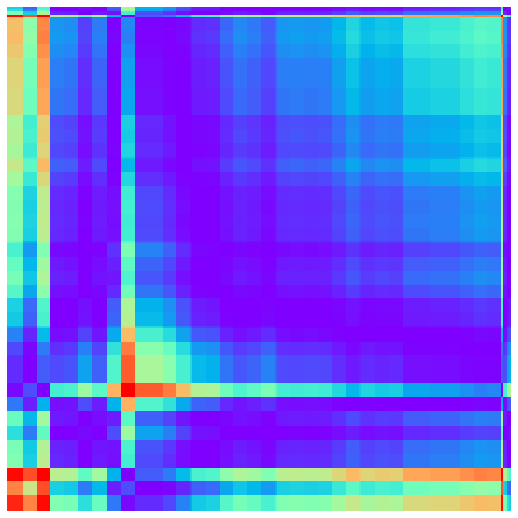

In [0]:
# Turn the Gramian Angular field into an image and then save it (currently using summation model)
fig = plt.figure(figsize=(7, 7), frameon=False)
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 ngrids=None,
                 share_all=True,
                 label_mode="1",
                 )
images = [X_gasf[0]]
titles = ['']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
    ax.axis('off')


plt.tight_layout(pad=0)
plt.show() 

#File saving code
fig.savefig('/content/gdrive/My Drive/BTCdatasets/temp.png', dpi=fig.dpi)


